# A Data Science Project: Apple Twitter Sentiment Analysis

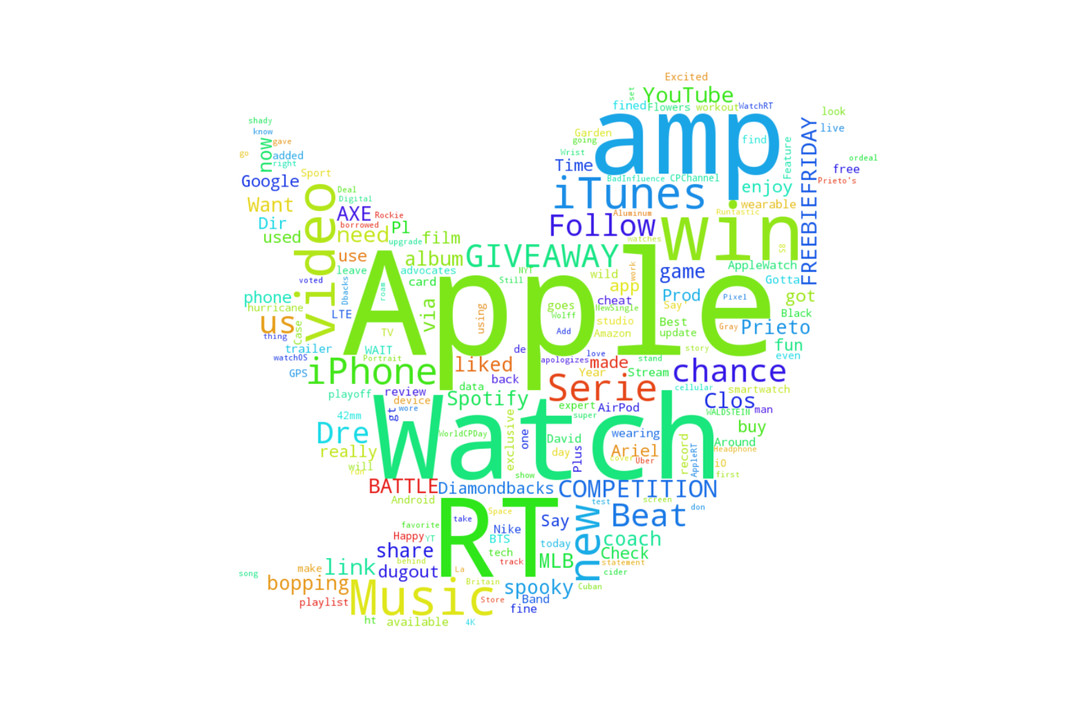


Name: Abdul Wadood Asim

Email: abdulwadoodasim456@gmail.com

LinkInn: www.linkedin.com/in/abdul-wadood-asim

In [171]:
# importing Necessary libraries
# Natural Language Toolkit for text processing
import nltk
# Download stopwords for text cleaning
nltk.download('stopwords')
# For data manipulation and analysis
import pandas as pd
import numpy as np
# For regular expression operations
import re
# For data visualization
import seaborn as sns
import matplotlib.pyplot as plt
# For styling plots
from matplotlib import style
style.use('ggplot') # Set plot style
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer # For stemming words

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english')) # Now this line should work

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [172]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [173]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Dealing with Legacy Data:
 Older datasets or files might have been encoded using Latin-1. To read or write such files correctly without encountering encoding errors, you would specify encoding='latin-

In [174]:
df = pd.read_csv('/content/Apple-Twitter-Sentiment-DFE.csv', encoding='latin-1') # Try reading with 'latin-1' encoding

In [175]:
df.head()

_unit_id  _golden _unit_state  _trusted_judgments _last_judgment_at  \
0  623495513     True      golden                  10               NaN   
1  623495514     True      golden                  12               NaN   
2  623495515     True      golden                  10               NaN   
3  623495516     True      golden                  17               NaN   
4  623495517    False   finalized                   3    12/12/14 12:14   

  sentiment  sentiment:confidence                            date  \
0         3                0.6264  Mon Dec 01 19:30:03 +0000 2014   
1         3                0.8129  Mon Dec 01 19:43:51 +0000 2014   
2         3                1.0000  Mon Dec 01 19:50:28 +0000 2014   
3         3                0.5848  Mon Dec 01 20:26:34 +0000 2014   
4         3                0.6474  Mon Dec 01 20:29:33 +0000 2014   

             id            query   sentiment_gold  \
0  5.400000e+17  #AAPL OR @Apple  3\nnot_relevant   
1  5.400000e+17  #AAPL OR @Apple             3\n1   
2  5.400000e+17  #AAPL OR @Apple                3   
3  5.400000e+17  #AAPL OR @Apple             3\n1   
4  5.400000e+17  #AAPL OR @Apple              NaN   

                                                text  
0  #AAPL:The 10 best Steve Jobs emails ever...htt...  
1  RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...  
2  My cat only chews @apple cords. Such an #Apple...  
3  I agree with @jimcramer that the #IndividualIn...  
4       Nobody expects the Spanish Inquisition #AAPL

# Data set  Under Standing

In [176]:
df.isnull().sum()

_unit_id                   0
_golden                    0
_unit_state                0
_trusted_judgments         0
_last_judgment_at        103
sentiment                  0
sentiment:confidence       0
date                       0
id                         0
query                      0
sentiment_gold          3783
text                       0
dtype: int64

In [177]:
df.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'sentiment', 'sentiment:confidence', 'date', 'id',
       'query', 'sentiment_gold', 'text'],
      dtype='object')

# Columns Droping
My requirments was Sentiment Analysis so I only need the Text Column. rest i would drop all

In [178]:
text_df = df.drop(['_unit_id', '_golden', '_unit_state', '_trusted_judgments', '_last_judgment_at',
       'sentiment', 'sentiment:confidence', 'date', 'query', 'sentiment_gold','date', 'id'], axis=1)
text_df.head()

text
0  #AAPL:The 10 best Steve Jobs emails ever...htt...
1  RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2  My cat only chews @apple cords. Such an #Apple...
3  I agree with @jimcramer that the #IndividualIn...
4       Nobody expects the Spanish Inquisition #AAPL

In [179]:
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

#AAPL:The 10 best Steve Jobs emails ever...http://t.co/82G1kL94tx 

RT @JPDesloges: Why AAPL Stock Had a Mini-Flash Crash Today $AAPL #aapl
http://t.co/hGFcjYa0E9 

My cat only chews @apple cords. Such an #AppleSnob. 

I agree with @jimcramer that the #IndividualInvestor should own not trade #Apple #AAPL, it's extended so today's pullback is good to see 

Nobody expects the Spanish Inquisition #AAPL 



Printing the first five text entries from a pandas DataFrame called text_df

In [180]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3886 entries, 0 to 3885
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3886 non-null   object
dtypes: object(1)
memory usage: 30.5+ KB


# Text Processing
Removing extra rather then text like(stop words, special character,digits,symbols,links etc)

In [181]:

stop_words = set(stopwords.words('english'))

def data_processing(text):
    # Lowercasing
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)

    # Remove punctuation
    text = re.sub(r'\@w+|\#','',text)

    # Consider fixing this regex pattern if you intend to remove mentions and hashtags
    text = re.sub(r'[^\w\s]','',text)
    # Remove digits
    text = re.sub(r'\d+', '', text)
    # Tokenizing
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

text_df.text = text_df['text'].apply(data_processing)

# Drope Duplicates

In [182]:
text_df = text_df.drop_duplicates('text')

# Stemming with PorterStemme
The goal of stemming is to normalize words, so that variations of the same word are treated as the same token.
**For Text normalization**,
**For information retrieval**,
**For Text classification**

Example:
 "playing", "plays", and "played". The Porter Stemmer would reduce all of these words to the stem "play". This means that when analyzing text, these three words would be treated as the same token, even though they have different endings.

In [183]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [184]:
text_df['text'] = text_df['text'].apply(lambda x: stemming(x))

In [185]:
text_df.head()

text
0    aaplthe best steve jobs emails everhttptcogkltx
1  rt jpdesloges aapl stock miniflash crash today...
2                    cat chews apple cords applesnob
3  agree jimcramer individualinvestor trade apple...
4            nobody expects spanish inquisition aapl

text data is now cleaned

In [186]:
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

aaplthe best steve jobs emails everhttptcogkltx 

rt jpdesloges aapl stock miniflash crash today aapl aapl httptcohgfcjyae 

cat chews apple cords applesnob 

agree jimcramer individualinvestor trade apple aapl extended todays pullback good see 

nobody expects spanish inquisition aapl 



print five Enteries
Entries are clean

In [187]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3193 entries, 0 to 3884
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3193 non-null   object
dtypes: object(1)
memory usage: 49.9+ KB


# Checking Polarity


In [188]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [189]:
text_df['polarity'] = text_df['text'].apply(polarity)

In [190]:
text_df.head(10)

text  polarity
0    aaplthe best steve jobs emails everhttptcogkltx  1.000000
1  rt jpdesloges aapl stock miniflash crash today...  0.000000
2                    cat chews apple cords applesnob  0.000000
3  agree jimcramer individualinvestor trade apple...  0.700000
4            nobody expects spanish inquisition aapl  0.000000
5  aapl rocket stocks buy december gains apple mo...  0.000000
6      top apple tablets damn right httptcorjignjuub  0.392857
7  cnbctv apples margins better expected aapl htt...  0.200000
8  apple inc flash crash need know httptcoyjigtif...  0.000000
9  aaplthis presentation shows makes worlds bigge...  0.000000

# Polariy
< 0 for negative(less then zero)

 0 for Neutral(equal to zero)

 > 0 for Positive (greater then zero)

In [191]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [192]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)

In [193]:
text_df.head()

text  polarity sentiment
0    aaplthe best steve jobs emails everhttptcogkltx       1.0  Positive
1  rt jpdesloges aapl stock miniflash crash today...       0.0   Neutral
2                    cat chews apple cords applesnob       0.0   Neutral
3  agree jimcramer individualinvestor trade apple...       0.7  Positive
4            nobody expects spanish inquisition aapl       0.0   Neutral

# Visulization

In [194]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = text_df)

<Axes: xlabel='sentiment', ylabel='count'>

In [195]:
fig = plt.figure(figsize=(9,9))
colors = ("green", "Blue", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

Text(0.5, 1.0, 'Distribution of sentiments')

Neutral have more percentage

# Positive Sentiments

In [196]:
pos_tweets = text_df[text_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

text  polarity sentiment
0       aaplthe best steve jobs emails everhttptcogkltx       1.0  Positive
3208  apple apple names best iphone ipad apps year m...       1.0  Positive
3130          apple conclusion best client service ever       1.0  Positive
3109  apple apple names best iphone ipad apps year m...       1.0  Positive
3077  mastercard teams gwen stefani promote apple pa...       1.0  Positive

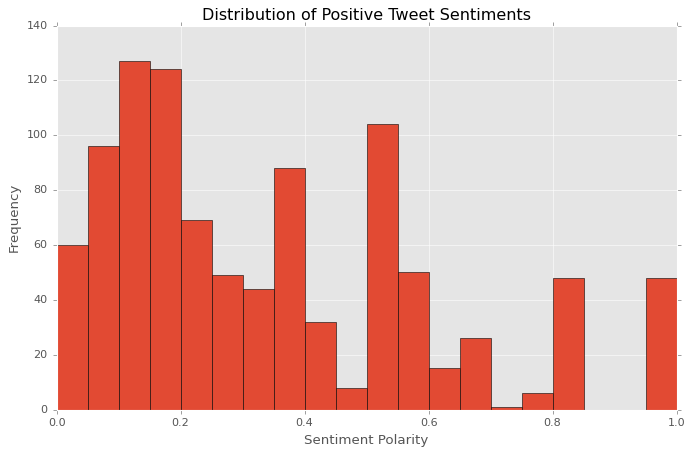

In [197]:
# @title Distribution of Positive Tweet Sentiments

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(pos_tweets['polarity'], bins=20, edgecolor='black')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
_ = plt.title('Distribution of Positive Tweet Sentiments')

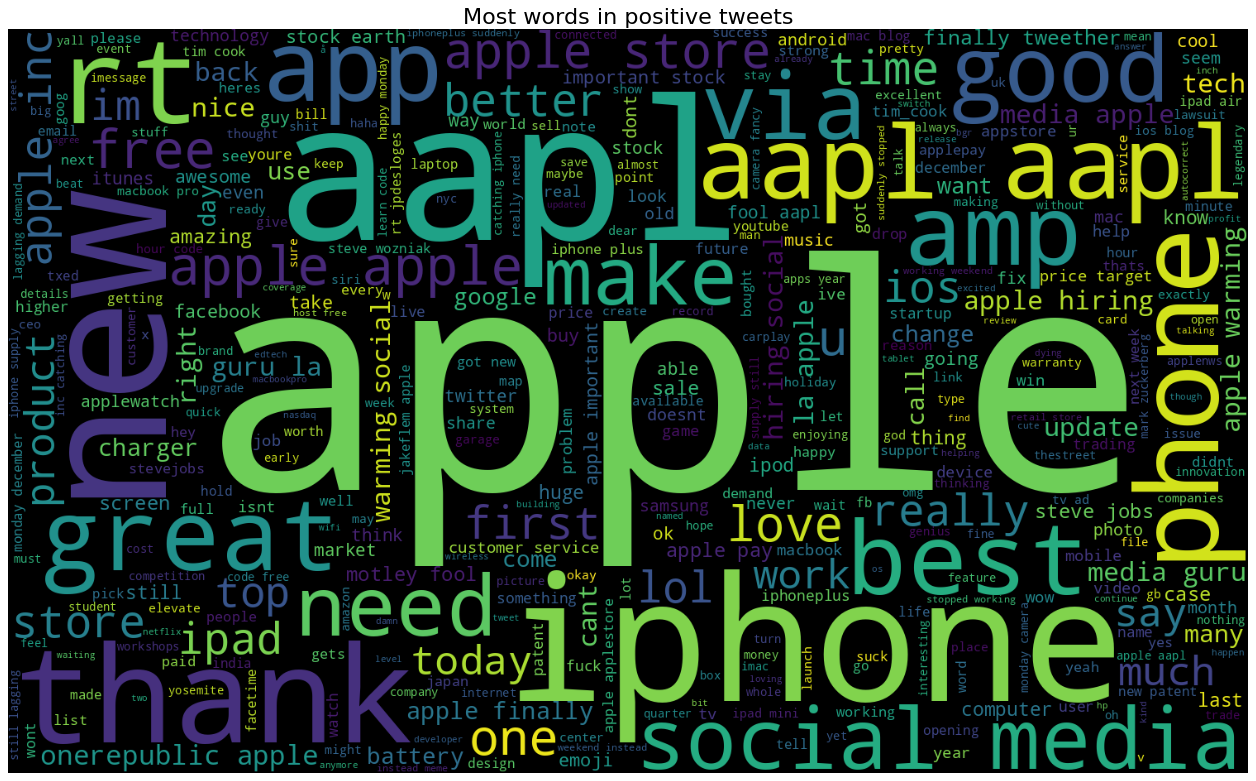

In [198]:
from wordcloud import WordCloud
text = ' '.join([word for word in pos_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=400, width=1500, height=900).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most words in positive tweets', fontsize=20)
plt.show()

 Here I have highlighted the  the most prominent terms associated with a Positive  sentiment.

# Negative Sentiment

In [199]:
neg_tweets = text_df[text_df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

text  polarity sentiment
2876  computers slow right making want shoot someone... -0.007143  Negative
1806  ok seriously apple going fix ios im still miss... -0.011111  Negative
3649  actual stock market positions starting show pr... -0.012500  Negative
2323  apple httptcoroyowjfiw nice piece crap youve c... -0.013333  Negative
3483  congrats apple mean wasnt using googlehangouts... -0.013393  Negative

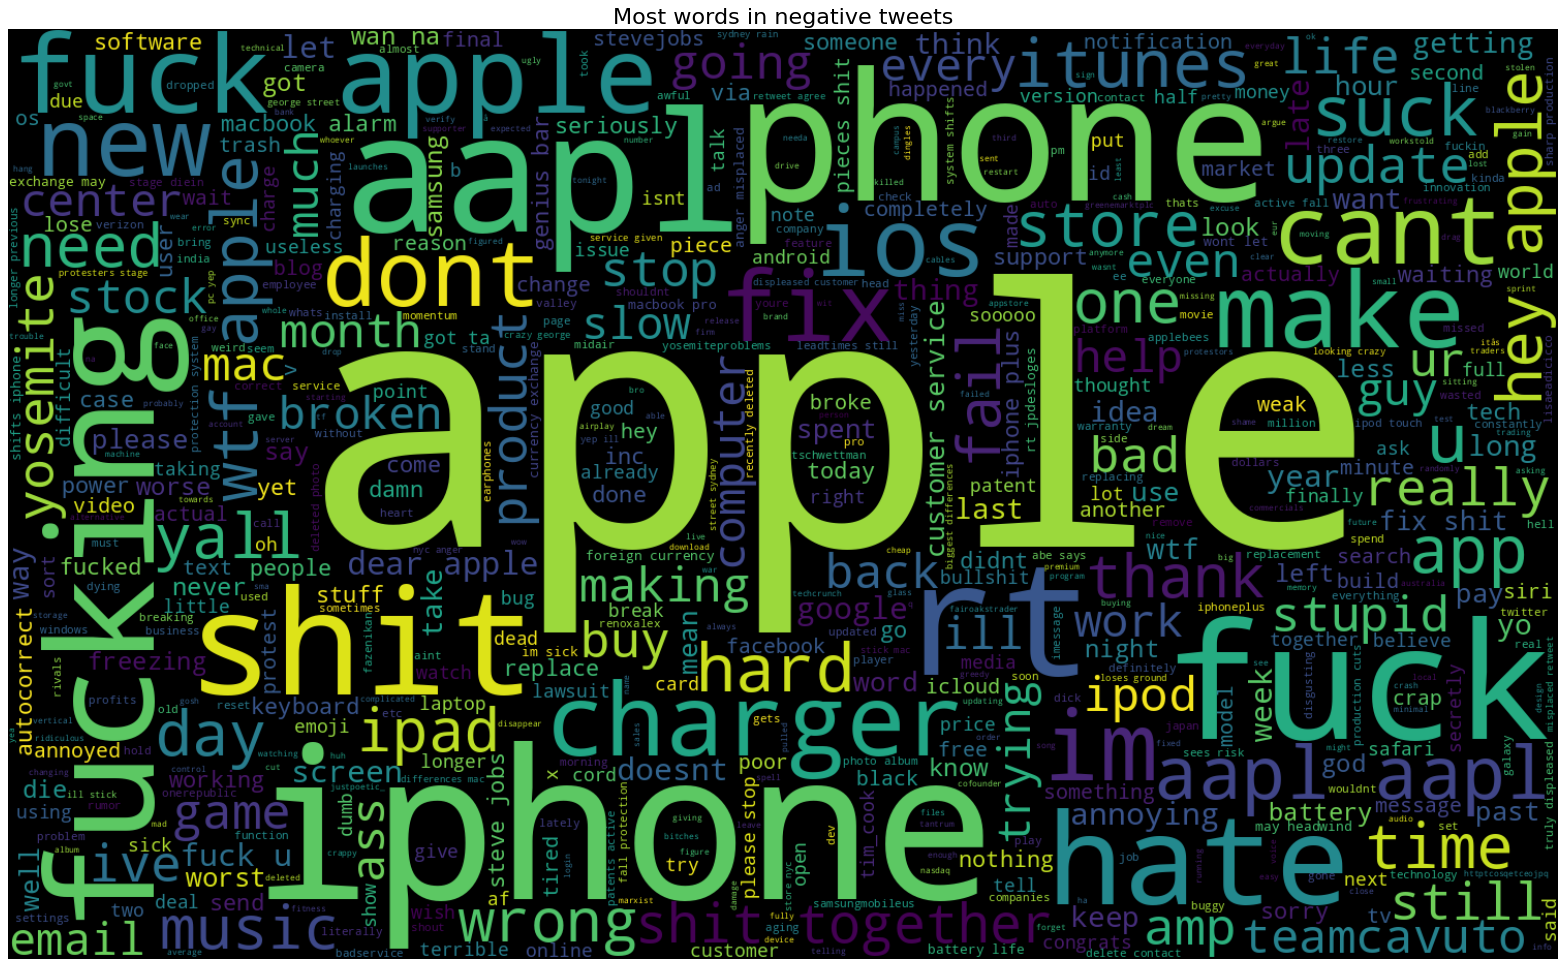

In [200]:
from wordcloud import WordCloud
text = ' '.join([word for word in neg_tweets['text']])
plt.figure(figsize=(25,20), facecolor='None')
wordcloud = WordCloud(max_words=600, width=1500, height=900).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most words in negative tweets', fontsize=20)
plt.show()

 Here I have highlighted the  the most prominent terms associated with a Negative sentiment.

# Neutral Sentiments

In [201]:
neutral_tweets = text_df[text_df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

text  polarity sentiment
1     rt jpdesloges aapl stock miniflash crash today...       0.0   Neutral
2515  seems similar apple google cloud backup pictur...       0.0   Neutral
2545               apple yo ya coming charger case hurr       0.0   Neutral
2543  trademark confusion apple app store trademark ...       0.0   Neutral
2539  apple app coming soon still production hypedtunes       0.0   Neutral

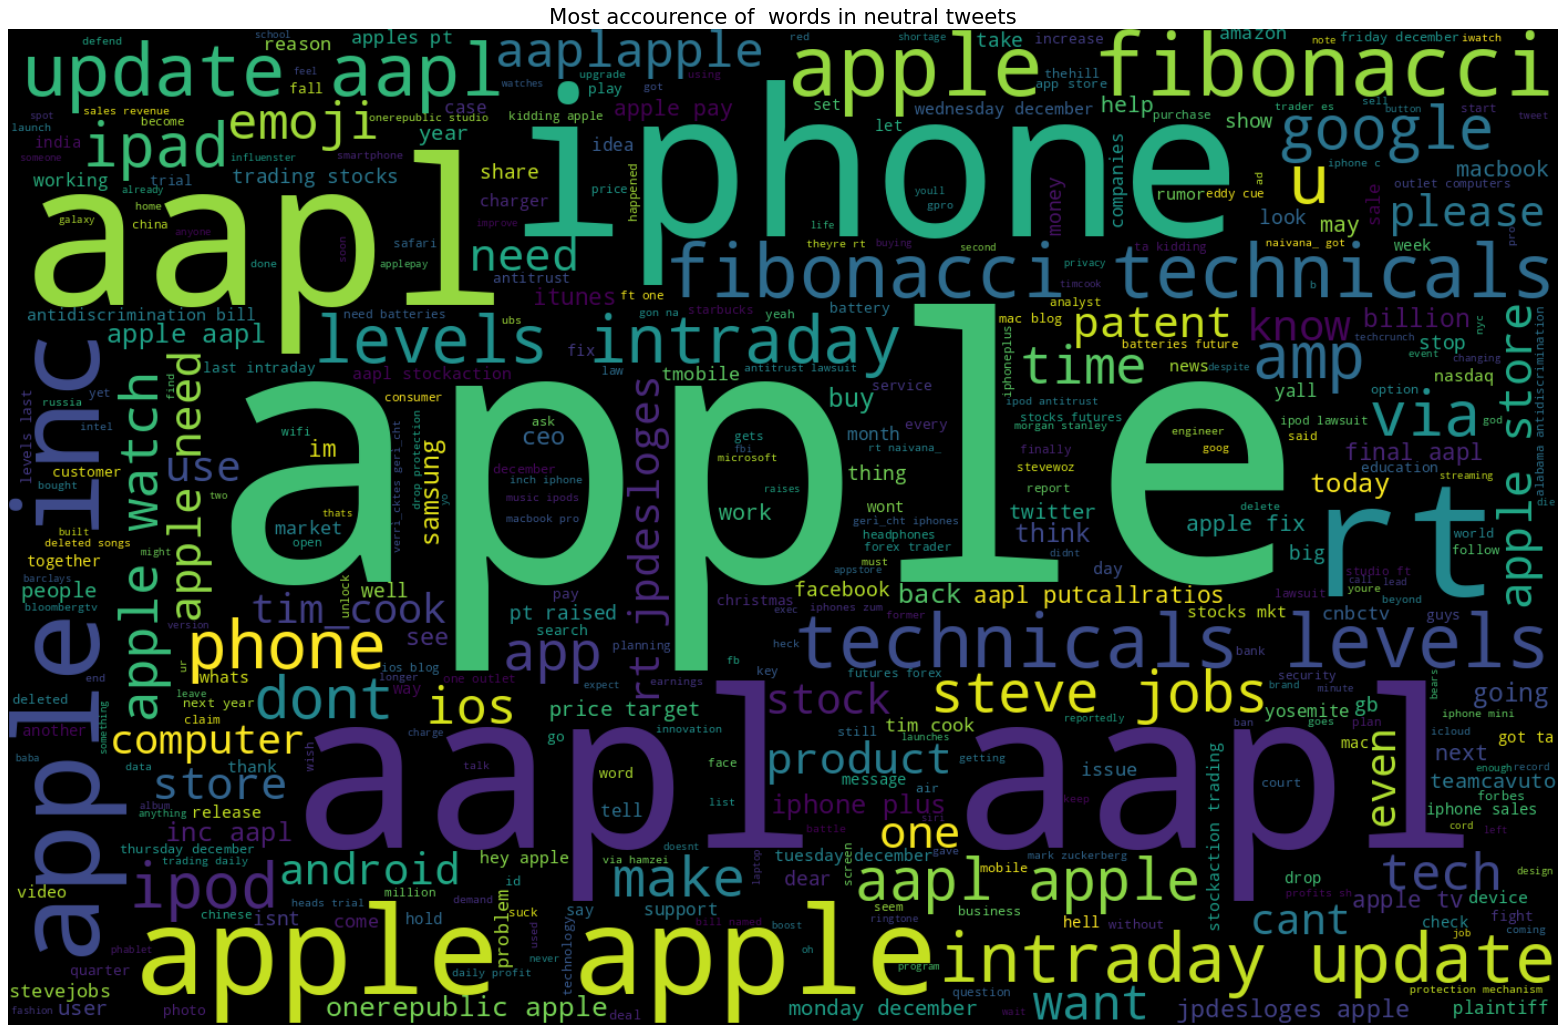

In [202]:
from wordcloud import WordCloud
text = ' '.join([word for word in neutral_tweets['text']])
plt.figure(figsize=(25,20), facecolor='None')
wordcloud = WordCloud(max_words=400, width=1400, height=900).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most accourence of  words in neutral tweets', fontsize=19)
plt.show()

 Here I have highlighted the  the most prominent terms associated with a Neutral sentiment.

_______________________________________________________

# Logistic Regression Model

In [218]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


# Prepare Text data for Model:

Identifying all the unique words and word pairs present in your dataset.
Creating a way to represent any text as a vector of numbers, where each number corresponds to the count of a specific word or word pair.
# CountVectorization
convert text data into a numerical representation that machine learning models can understand.
# N-gram
N-grams are sequences of 'n' consecutive words in a text. This captures some of the context and relationships between words.
# Prepare Text data for Model:

Identifying all the unique words and word pairs present in your dataset.
Creating a way to represent any text as a vector of numbers, where each number corresponds to the count of a specific word or word pair.

In [219]:
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['text'])

In [220]:
print(vect.get_feature_names_out())

['__w' '__w apple' '_coredump' ... 'zuckerbergs newest' 'zum' 'zum apple']


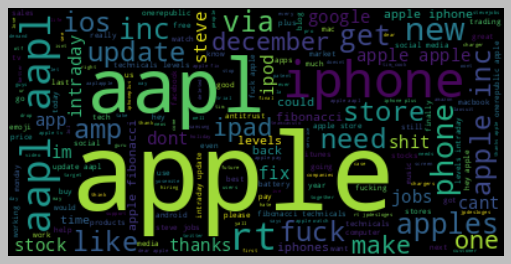

In [221]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Transform your text data into a count matrix
count_matrix = vect.transform(text_df['text'])

# Get word frequencies
word_freq = dict(zip(vect.get_feature_names_out(), count_matrix.sum(axis=0).tolist()[0]))

# Generate word cloud
wordcloud = WordCloud().generate_from_frequencies(word_freq)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [222]:
X = text_df['text']
Y = text_df['sentiment']
X = vect.transform(X)

In [223]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [224]:
print("Size of x_train:", (x_train.shape))


Size of x_train: (2554, 28099)


In [225]:
print("Size of y_train:", (y_train.shape))


Size of y_train: (2554,)


In [227]:
print("Size of x_test:", (x_test.shape))


Size of x_test: (639, 28099)


In [228]:
print("Size of y_test:", (y_test.shape))

Size of y_test: (639,)


In [229]:
import warnings
warnings.filterwarnings('ignore')

# Test Accuracy

In [230]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 79.34%


# Model Accuracy

In [231]:
Accuracy = accuracy_score(y_test, logreg_pred)
print("Accuracy:", Accuracy)

Accuracy: 0.7934272300469484


Accuracy is 79.34%

# Train Accuracy

In [232]:
import warnings
warnings.filterwarnings('ignore')

logreg = LogisticRegression()
logreg.fit(x_train, y_train) # This line fits the model to the training data
logreg_pred_train = logreg.predict(x_train)
logreg_acc_train = accuracy_score(logreg_pred_train, y_train)
print("Train accuracy: {:.2f}%".format(logreg_acc_train*100))

Train accuracy: 100.00%


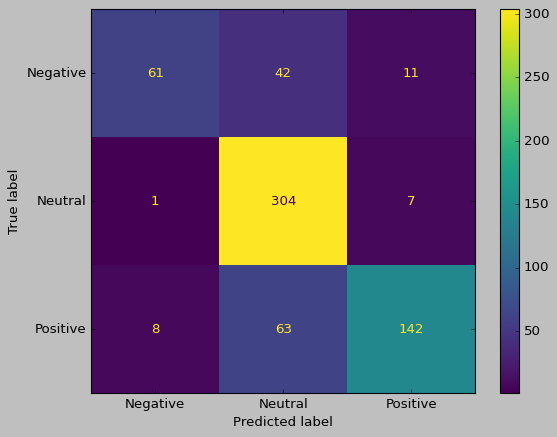

In [233]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

# Insights
I have Achived Accuracy of Model  Logestic regression  79.34%